In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
df = pd.read_csv("./bike_weather_joined.csv")

df.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp
0,0,2022-12-01 00:00:03,1,22,9,0.0,7.4
1,1,2022-12-01 00:00:03,2,10,10,0.0,7.4
2,2,2022-12-01 00:00:03,3,7,13,0.0,7.4
3,3,2022-12-01 00:00:03,4,15,5,0.0,7.4
4,4,2022-12-01 00:00:03,5,1,39,0.0,7.4


In [3]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [4]:
cutoff_date = pd.to_datetime('2023-01-01')

In [5]:
df = df[df['TIME']> cutoff_date]

In [6]:
df.dtypes

Unnamed: 0                        int64
TIME                     datetime64[ns]
STATION ID                        int64
AVAILABLE_BIKE_STANDS             int64
AVAILABLE_BIKES                   int64
rain                            float64
temp                            float64
dtype: object

In [7]:
# Get day of the week
df['week'] = df['TIME'].dt.isocalendar().week
df['weekday'] = df['TIME'].dt.day_name()
df['hour'] = df['TIME'].dt.hour
df.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp,week,weekday,hour
168144,168144,2023-02-01 00:00:03,1,29,2,0.0,6.1,5,Wednesday,0
168145,168145,2023-02-01 00:00:03,2,0,20,0.0,6.1,5,Wednesday,0
168146,168146,2023-02-01 00:00:03,3,6,14,0.0,6.1,5,Wednesday,0
168147,168147,2023-02-01 00:00:03,4,18,2,0.0,6.1,5,Wednesday,0
168148,168148,2023-02-01 00:00:03,5,12,28,0.0,6.1,5,Wednesday,0


In [8]:
weekdays = df.groupby(['weekday', 'STATION ID'])['AVAILABLE_BIKES'].mean()

In [9]:
weekdays.head(30)

weekday  STATION ID
Friday   1             12.362369
         2              6.663415
         3              7.291289
         4              8.903136
         5             21.195122
         6              3.900348
         7              6.878746
         8             10.632056
         9             11.810453
         10            10.470383
         11             5.800000
         12             5.718467
         13             3.616725
         14            17.833449
         15             3.562369
         16             9.965854
         17             3.197213
         18             8.739373
         19            12.298955
         20             8.691289
         21            13.755401
         22            11.364460
         23            18.886411
         24            11.519861
         25             8.543554
         26             8.262718
         27             8.641812
         28            12.339373
         29            15.273171
         30            

In [10]:
# # weekdays.plot(kind='bar')
# plt.figure()
# for name, groupedData in weekdays.groupby(['NAME']):
#     print(name)
#     groupedData.plot(kind = 'bar', label=name)
#     plt.show()



In [11]:
from sklearn.model_selection import train_test_split
monday = df[(df['weekday']=='Monday') & ( df['STATION ID'] == 1)]

x_train, x_test, y_train, y_test = train_test_split(monday['hour'], monday['AVAILABLE_BIKES'], test_size = 0.4, random_state=23)

In [12]:
monday.head()

,Unnamed: 0,TIME,STATION ID,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,rain,temp,week,weekday,hour
195264,195264,2023-02-06 00:00:03,1,4,27,0.0,-1.0,6,Monday,0
195377,195377,2023-02-06 00:30:02,1,4,27,0.0,0.1,6,Monday,0
195490,195490,2023-02-06 01:00:03,1,4,27,0.0,0.1,6,Monday,1
195603,195603,2023-02-06 01:30:02,1,2,29,0.0,1.4,6,Monday,1
195716,195716,2023-02-06 02:00:03,1,2,29,0.0,1.4,6,Monday,2


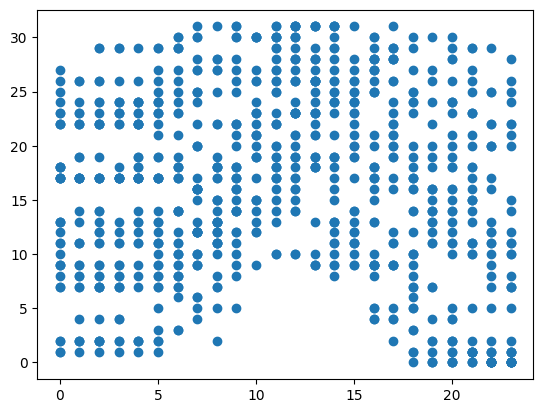

In [13]:
plt.scatter(x_train, y_train)  

In [14]:
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
print(x_train)

[[19]
 [16]
 [ 3]
 [10]
 [14]
 [ 3]
 [ 8]
 [14]
 [14]
 [ 1]
 [16]
 [ 7]
 [23]
 [16]
 [18]
 [ 4]
 [ 6]
 [17]
 [ 3]
 [23]
 [12]
 [ 9]
 [ 7]
 [18]
 [ 9]
 [15]
 [ 0]
 [18]
 [11]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [ 3]
 [13]
 [18]
 [13]
 [13]
 [ 6]
 [ 9]
 [23]
 [12]
 [ 7]
 [14]
 [ 2]
 [17]
 [19]
 [ 9]
 [12]
 [21]
 [21]
 [21]
 [20]
 [18]
 [ 9]
 [ 6]
 [23]
 [ 5]
 [19]
 [13]
 [ 6]
 [14]
 [ 0]
 [18]
 [ 4]
 [20]
 [15]
 [ 8]
 [ 7]
 [17]
 [20]
 [ 2]
 [ 9]
 [22]
 [22]
 [13]
 [ 4]
 [ 5]
 [ 5]
 [16]
 [ 3]
 [ 7]
 [15]
 [16]
 [ 5]
 [ 3]
 [ 9]
 [10]
 [ 1]
 [ 4]
 [ 2]
 [ 6]
 [ 3]
 [ 6]
 [17]
 [20]
 [17]
 [ 0]
 [15]
 [23]
 [18]
 [12]
 [14]
 [ 0]
 [21]
 [ 4]
 [11]
 [18]
 [ 5]
 [ 5]
 [ 1]
 [17]
 [ 8]
 [ 4]
 [ 4]
 [ 7]
 [12]
 [ 5]
 [15]
 [21]
 [22]
 [15]
 [16]
 [20]
 [ 1]
 [21]
 [15]
 [11]
 [22]
 [18]
 [ 8]
 [ 6]
 [11]
 [ 6]
 [10]
 [15]
 [16]
 [ 4]
 [ 2]
 [21]
 [13]
 [ 7]
 [ 2]
 [14]
 [ 8]
 [15]
 [21]
 [ 9]
 [ 5]
 [17]
 [ 0]
 [23]
 [ 7]
 [ 9]
 [ 0]
 [23]
 [17]
 [20]
 [ 7]
 [21]
 [ 2]
 [13]
 [22]
 [13]
 [ 1]
 [ 5]
 [23

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
c = lr.intercept_
m = lr.coef_
m

array([[-0.09586373]])

In [19]:
y_pred_train = lr.predict(x_train)

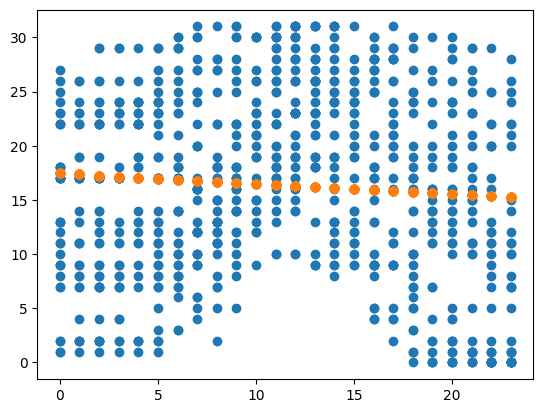

In [20]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [21]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

print(poly_reg_model.intercept_, poly_reg_model.coef_)



[13.34831837] [[ 0.44823044  0.04951561 -0.00349594]]


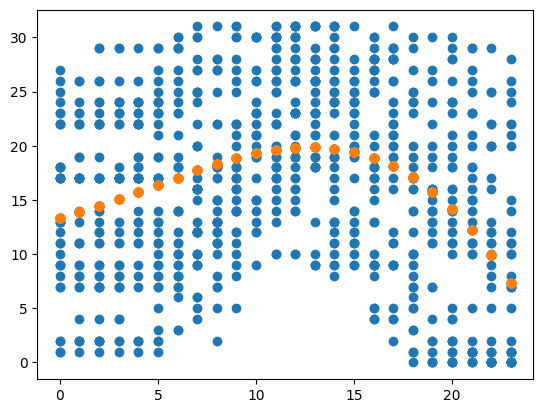

In [22]:
y_pred_train = poly_reg_model.predict(poly_features)
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train)
plt.show()

In [23]:
df = df.drop(columns='TIME')

In [24]:
df = df[df['STATION ID'] == 1]

In [25]:
df = df.dropna()
df['weekday'] = df['weekday'].astype('category')
df['weekday'] = df['weekday'].cat.codes
x = df.drop(columns=['AVAILABLE_BIKES', 'AVAILABLE_BIKE_STANDS'])
# stands = df.drop(columns=) /
y = df['AVAILABLE_BIKES']

In [26]:
# for station in df['STATION ID'].unique():
#     pd.plotting.scatter_matrix(df[df['STATION ID'] == station], figsize=(10, 10))
#     plt.show()



In [27]:
y

168144      2
168257      2
168370      2
168483      2
168596      2
           ..
1157123    20
1157237    20
1157351    23
1157465     0
1157579     0
Name: AVAILABLE_BIKES, Length: 8683, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred_train = lr.predict(x_train)

In [33]:
y_pred_train

array([17.90649094, 13.84135256, 15.3093535 , ..., 15.5359388 ,
       11.38177568, 16.94108055])

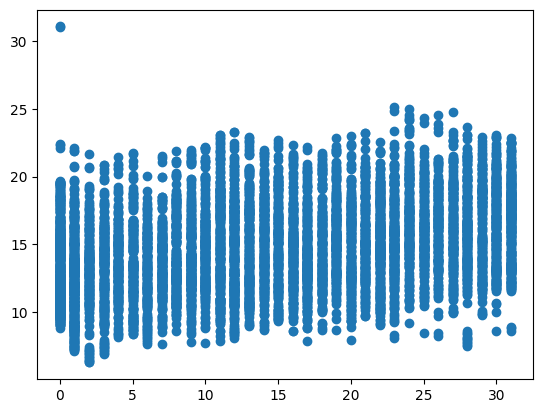

In [34]:
plt.scatter(y_train, y_pred_train)

In [35]:
y_pred_test = lr.predict(x_test)

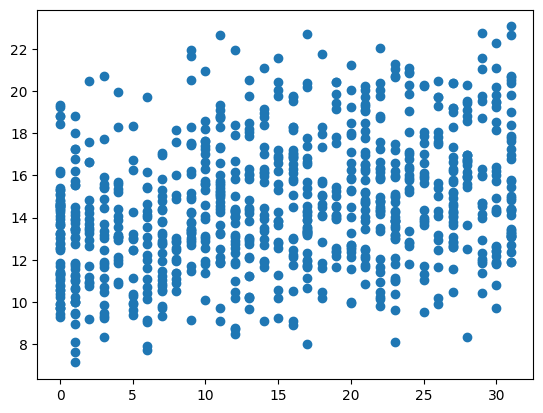

In [36]:
plt.scatter(y_test, y_pred_test)

In [37]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

print(poly_reg_model.intercept_, poly_reg_model.coef_)



21.32781454089329 [ 3.85065104e-04 -7.61136832e-06 -3.11305249e-08  8.53715833e-06
 -3.02537946e-06  2.17500040e-06  2.00329263e-05  8.44072403e-11
 -2.24372388e-04 -1.31500682e-06  2.59098356e-07 -1.25967832e-06
  8.47482827e-07  1.64326117e-06  5.02990018e-15 -3.16348628e-08
  8.53547944e-06 -3.02509475e-06  2.17504850e-06  2.00332793e-05
  4.24002253e-07  5.07497265e-07  2.29652167e-07 -2.18559701e-07
 -2.72358775e-06  3.69734947e-05 -7.64481355e-05  1.17839352e-04
  1.48423937e-04  4.08217589e-05 -2.05063064e-05 -2.85897429e-04
  1.60912486e-05  7.00923399e-07  2.20971156e-04 -1.42244784e-16
  1.00624248e-10  3.17126489e-11 -9.35451715e-12  4.75399718e-12
  1.20132651e-11 -5.77953530e-12 -2.24372388e-04 -1.31500691e-06
  2.59098365e-07 -1.25967829e-06  8.47482859e-07  1.64326118e-06
  2.38537343e-07 -6.56307672e-08 -5.78656917e-07  2.21978321e-07
 -1.87860809e-07  5.07453392e-08  1.41932680e-07 -4.68505039e-08
  1.69149011e-07 -3.60042016e-08 -1.91572196e-07 -7.37510240e-08
 -9.568

In [38]:
y_pred_train = poly_reg_model.predict(poly_features)

poly_test_features = poly.fit_transform(x_test)
y_pred_train = poly_reg_model.predict(poly_features)

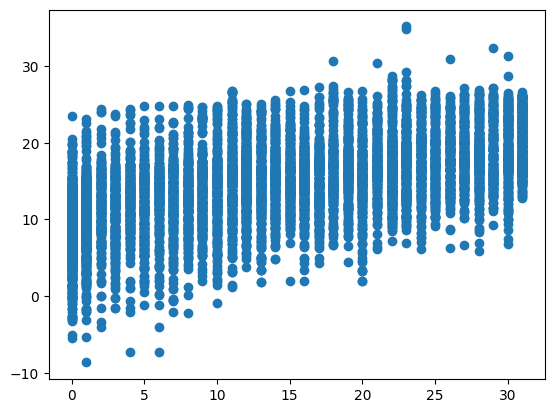

In [39]:
plt.scatter(y_train, y_pred_train)

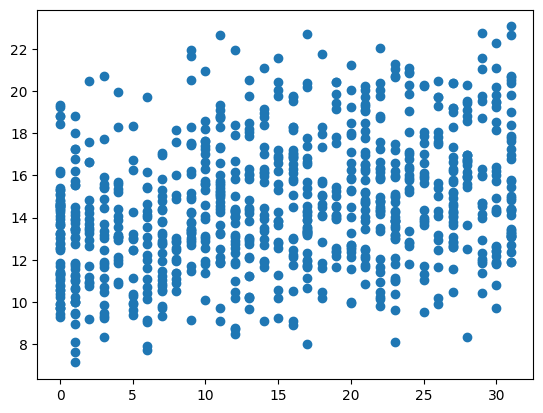

In [40]:
plt.scatter(y_test, y_pred_test)


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
r2 = r2_score(y_train, y_pred_train)
print(r2)

0.31763068366901326
